In [130]:
import nltk
nltk.download('gutenberg')
from nltk.corpus import gutenberg
import pandas as pd

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\nico_\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


In [131]:
data=gutenberg.raw('shakespeare-hamlet.txt')

with open('hamlet.txt','w') as file:
    file.write(data)

In [132]:
data

"[The Tragedie of Hamlet by William Shakespeare 1599]\n\n\nActus Primus. Scoena Prima.\n\nEnter Barnardo and Francisco two Centinels.\n\n  Barnardo. Who's there?\n  Fran. Nay answer me: Stand & vnfold\nyour selfe\n\n   Bar. Long liue the King\n\n   Fran. Barnardo?\n  Bar. He\n\n   Fran. You come most carefully vpon your houre\n\n   Bar. 'Tis now strook twelue, get thee to bed Francisco\n\n   Fran. For this releefe much thankes: 'Tis bitter cold,\nAnd I am sicke at heart\n\n   Barn. Haue you had quiet Guard?\n  Fran. Not a Mouse stirring\n\n   Barn. Well, goodnight. If you do meet Horatio and\nMarcellus, the Riuals of my Watch, bid them make hast.\nEnter Horatio and Marcellus.\n\n  Fran. I thinke I heare them. Stand: who's there?\n  Hor. Friends to this ground\n\n   Mar. And Leige-men to the Dane\n\n   Fran. Giue you good night\n\n   Mar. O farwel honest Soldier, who hath relieu'd you?\n  Fra. Barnardo ha's my place: giue you goodnight.\n\nExit Fran.\n\n  Mar. Holla Barnardo\n\n   Bar. 

In [133]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [134]:
# Load the dataset
with open('hamlet.txt','r') as file:
    text=file.read().lower()

In [135]:
# Tokenize the text to create index for words
tokenizer=Tokenizer()
tokenizer.fit_on_texts([text])
total_words=len(tokenizer.word_index) +1
total_words

4818

In [136]:
tokenizer.word_index

{'the': 1,
 'and': 2,
 'to': 3,
 'of': 4,
 'i': 5,
 'you': 6,
 'a': 7,
 'my': 8,
 'it': 9,
 'in': 10,
 'that': 11,
 'ham': 12,
 'is': 13,
 'not': 14,
 'his': 15,
 'this': 16,
 'with': 17,
 'your': 18,
 'but': 19,
 'for': 20,
 'me': 21,
 'lord': 22,
 'as': 23,
 'what': 24,
 'he': 25,
 'be': 26,
 'so': 27,
 'him': 28,
 'haue': 29,
 'king': 30,
 'will': 31,
 'no': 32,
 'our': 33,
 'we': 34,
 'on': 35,
 'are': 36,
 'if': 37,
 'all': 38,
 'then': 39,
 'shall': 40,
 'by': 41,
 'thou': 42,
 'come': 43,
 'or': 44,
 'hamlet': 45,
 'good': 46,
 'do': 47,
 'hor': 48,
 'her': 49,
 'let': 50,
 'now': 51,
 'thy': 52,
 'how': 53,
 'more': 54,
 'they': 55,
 'from': 56,
 'enter': 57,
 'at': 58,
 'was': 59,
 'oh': 60,
 'like': 61,
 'most': 62,
 'there': 63,
 'well': 64,
 'know': 65,
 'selfe': 66,
 'would': 67,
 'them': 68,
 'loue': 69,
 'may': 70,
 "'tis": 71,
 'vs': 72,
 'sir': 73,
 'qu': 74,
 'which': 75,
 'did': 76,
 'why': 77,
 'laer': 78,
 'giue': 79,
 'thee': 80,
 'ile': 81,
 'must': 82,
 'hath': 

In [137]:
# Create input sequences
input_sequences=[]
for line in text.split('\n'):
    token_list=tokenizer.texts_to_sequences([line])[0]  #[0] car tokenizer.texts_to_sequences renvoit [[...]] et on veut une liste []
    # Boucle ppour avoir des séquences croissantes
    for i in range(1,len(token_list)):
        n_gram_sequence=token_list[:i+1]  # du début jusqu'à la position i incluse
        input_sequences.append(n_gram_sequence)

In [138]:
input_sequences

[[1, 687],
 [1, 687, 4],
 [1, 687, 4, 45],
 [1, 687, 4, 45, 41],
 [1, 687, 4, 45, 41, 1886],
 [1, 687, 4, 45, 41, 1886, 1887],
 [1, 687, 4, 45, 41, 1886, 1887, 1888],
 [1180, 1889],
 [1180, 1889, 1890],
 [1180, 1889, 1890, 1891],
 [57, 407],
 [57, 407, 2],
 [57, 407, 2, 1181],
 [57, 407, 2, 1181, 177],
 [57, 407, 2, 1181, 177, 1892],
 [407, 1182],
 [407, 1182, 63],
 [408, 162],
 [408, 162, 377],
 [408, 162, 377, 21],
 [408, 162, 377, 21, 247],
 [408, 162, 377, 21, 247, 882],
 [18, 66],
 [451, 224],
 [451, 224, 248],
 [451, 224, 248, 1],
 [451, 224, 248, 1, 30],
 [408, 407],
 [451, 25],
 [408, 6],
 [408, 6, 43],
 [408, 6, 43, 62],
 [408, 6, 43, 62, 1893],
 [408, 6, 43, 62, 1893, 96],
 [408, 6, 43, 62, 1893, 96, 18],
 [408, 6, 43, 62, 1893, 96, 18, 566],
 [451, 71],
 [451, 71, 51],
 [451, 71, 51, 1894],
 [451, 71, 51, 1894, 567],
 [451, 71, 51, 1894, 567, 378],
 [451, 71, 51, 1894, 567, 378, 80],
 [451, 71, 51, 1894, 567, 378, 80, 3],
 [451, 71, 51, 1894, 567, 378, 80, 3, 273],
 [451, 71

In [139]:
# Pad the sequences
max_sequences_len=max([len(x) for x in input_sequences])
max_sequences_len

14

In [140]:
input_sequences = np.array(pad_sequences(input_sequences,maxlen=max_sequences_len,padding='pre'))

In [141]:
input_sequences

array([[   0,    0,    0, ...,    0,    1,  687],
       [   0,    0,    0, ...,    1,  687,    4],
       [   0,    0,    0, ...,  687,    4,   45],
       ...,
       [   0,    0,    0, ...,    4,   45, 1047],
       [   0,    0,    0, ...,   45, 1047,    4],
       [   0,    0,    0, ..., 1047,    4,  193]],
      shape=(25732, 14), dtype=int32)

In [142]:
# Create predictor and label
X,y=input_sequences[:,:-1],input_sequences[:,-1]

In [143]:
X

array([[   0,    0,    0, ...,    0,    0,    1],
       [   0,    0,    0, ...,    0,    1,  687],
       [   0,    0,    0, ...,    1,  687,    4],
       ...,
       [   0,    0,    0, ...,  687,    4,   45],
       [   0,    0,    0, ...,    4,   45, 1047],
       [   0,    0,    0, ...,   45, 1047,    4]],
      shape=(25732, 13), dtype=int32)

In [144]:
import tensorflow as tf

In [145]:
y

array([ 687,    4,   45, ..., 1047,    4,  193],
      shape=(25732,), dtype=int32)

In [146]:
# Convert y in one-hot
# La sortie doit etre une probabilité pour chaque mot du vocabulaire et qu'il n'y ait pas de relation numériques (softmax)
y=tf.keras.utils.to_categorical(y,num_classes=total_words)

In [147]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(25732, 4818))

In [148]:
# Split the data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [149]:
X_train

array([[   0,    0,    0, ...,   81,  686,   28],
       [   0,    0,    0, ...,    0, 1806,  289],
       [   0,    0,    0, ...,   42, 1381,   29],
       ...,
       [   0,    0,    0, ...,    0,  346,   71],
       [   0,    0,    0, ...,    0,   74,   45],
       [   0,    0,    0, ...,   28,   17,   16]],
      shape=(20585, 13), dtype=int32)

In [150]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(20585, 4818))

In [163]:
# Define early stopping
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [ ]:
# Train the LSTM RNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,LSTM,Dense,Dropout

# Model
model=Sequential()
model.add(Embedding(total_words,100,input_length=max_sequences_len-1))  # max_sequences_len-1 : taille de la séquence sans le dernier mot
# model.add(LSTM(150,return_sequences=True))
model.add(LSTM(150, return_sequences=True, dropout=0.2, recurrent_dropout=0.2))
model.add(Dropout(0.3))
#model.add(LSTM(100))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))  # dropout agit sur les entrées du LSTM (Xt) et recurrent_dropout agit sur sur les connexions internes de la mémoire (ht-1 -> ht)
model.add(Dense(total_words,activation="softmax"))

# Compile the model
#model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=optimizer,metrics=['accuracy'])


In [164]:
# Train the GRU RNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,Dense,Dropout,GRU

# Model
model=Sequential()
model.add(Embedding(total_words,100,input_length=max_sequences_len-1))  # max_sequences_len-1 : taille de la séquence sans le dernier mot
# model.add(GRU(150,return_sequences=True))
model.add(GRU(150, return_sequences=True, dropout=0.2, recurrent_dropout=0.2))
model.add(Dropout(0.3))
#model.add(GRU(100))
model.add(GRU(100, dropout=0.2, recurrent_dropout=0.2))  # dropout agit sur les entrées du LSTM (Xt) et recurrent_dropout agit sur sur les connexions internes de la mémoire (ht-1 -> ht)
model.add(Dense(total_words,activation="softmax"))

# Compile the model
#model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=optimizer,metrics=['accuracy'])

In [165]:
model.build(input_shape=(None, max_sequences_len-1))

In [166]:
model.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_16 (Embedding)        │ (None, 13, 100)        │       481,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_4 (GRU)                     │ (None, 13, 150)        │       113,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 13, 150)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_5 (GRU)                     │ (None, 100)            │        75,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 4818)           │       486,618 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,157,418 (4.42 MB)

 Trainable params: 1,157,418 (4.42 MB)

 Non-trainable params: 0 (0.00 B)

In [167]:
history=model.fit(X_train,y_train,epochs=50,validation_data=[X_test,y_test],verbose=1,callbacks=early_stopping)

Epoch 1/50
644/644 ━━━━━━━━━━━━━━━━━━━━ 24s 29ms/step - accuracy: 0.0335 - loss: 6.9859 - val_accuracy: 0.0342 - val_loss: 6.7271
Epoch 2/50
644/644 ━━━━━━━━━━━━━━━━━━━━ 17s 26ms/step - accuracy: 0.0375 - loss: 6.5020 - val_accuracy: 0.0455 - val_loss: 6.7750
Epoch 3/50
644/644 ━━━━━━━━━━━━━━━━━━━━ 17s 26ms/step - accuracy: 0.0487 - loss: 6.3302 - val_accuracy: 0.0488 - val_loss: 6.7838
Epoch 4/50
644/644 ━━━━━━━━━━━━━━━━━━━━ 17s 26ms/step - accuracy: 0.0549 - loss: 6.1894 - val_accuracy: 0.0530 - val_loss: 6.8059
Epoch 5/50
644/644 ━━━━━━━━━━━━━━━━━━━━ 17s 26ms/step - accuracy: 0.0572 - loss: 6.0575 - val_accuracy: 0.0527 - val_loss: 6.8375
Epoch 6/50
644/644 ━━━━━━━━━━━━━━━━━━━━ 17s 26ms/step - accuracy: 0.0646 - loss: 5.9207 - val_accuracy: 0.0641 - val_loss: 6.8864


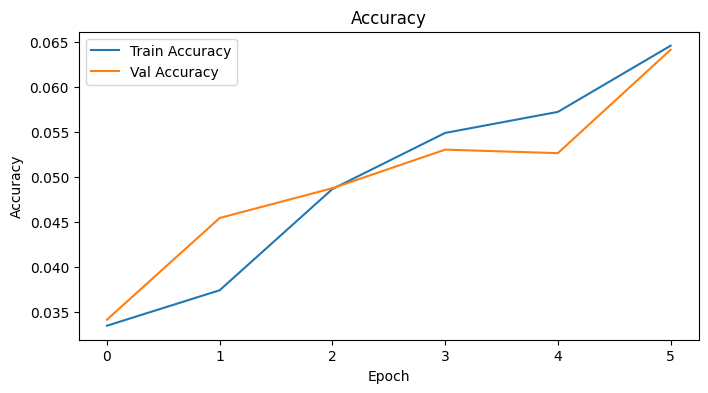

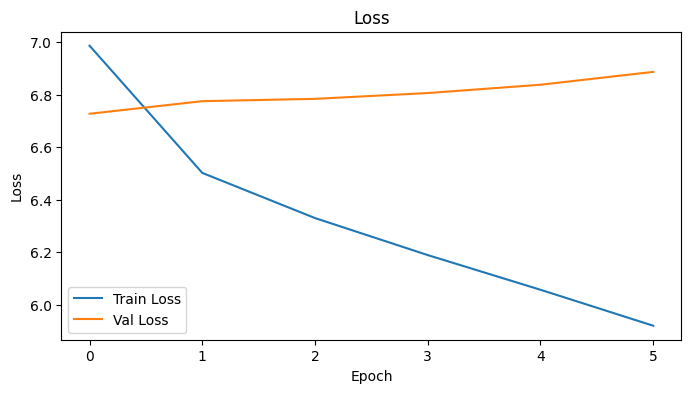

In [168]:
import matplotlib.pyplot as plt

# Accuracy
plt.figure(figsize=(8,4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Le modèle prédit le mot suivant parmi tout le vocabulaire (total_words).
Donc s’il y a 4818 mots possibles, la probabilité de tomber juste par hasard est 1/4818 = 0.02% 

Donc une accuracy de 5 %, 8 %, voire 10 % est en réalité très bonne.
En génération de texte, l’important n’est pas de deviner exactement le mot suivant, mais de générer des séquences cohérentes dans le style du texte.

In [169]:
# Function to predict the next word
def predict_next_word(model, tokenizer, text, max_sequence_len, temperature=1.0):
    token_list = tokenizer.texts_to_sequences([text])[0] # Convertit text en liste d’indices (tokens)
    if len(token_list) >= max_sequence_len:  # Si la séquence est trop longue pour l’entrée du modèle, on garde seulement la fin
        token_list = token_list[-(max_sequence_len-1):]  
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    #predicted = model.predict(token_list, verbose=0)  # Le modèle renvoie un vecteur de probabilités de taille vocab_size (shape (1, total_words))
    predicted = model.predict(token_list, verbose=0)[0]
    #predicted_word_index = np.argmax(predicted, axis=1)  # Prend l’indice du mot le plus probable
    #predicted_word_index = np.argmax(predicted)

    # Application de la température
    preds = np.log(predicted + 1e-9) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)

    # Échantillonnage pondéré
    predicted_index = np.random.choice(len(preds), p=preds)

    
    #predicted_word = tokenizer.index_word.get(predicted_word_index, None) # Convertit l’indice en mot avec tokenizer.index_word

    predicted_word = tokenizer.index_word.get(predicted_index, "")

    return predicted_word
    
    #for word, index in tokenizer.word_index.items():
        #if index == predicted_word_index:
            #return word
    #return None

In [170]:
input_text="To be or not to be"
max_sequences_len = model.input_shape[1]+1  # model.input_shape[1] = 13 -> utilisé à l’entraînement, car on donnait le contexte sans le dernier mot. On ajoute + 1 pour retrouver la valeur complète max_sequences_len (contexte + mot cible)
next_word=predict_next_word(model,tokenizer,input_text,max_sequences_len)
print(f"Input text:{input_text}")
print(f"Next Word PRediction:{next_word}")

Input text:To be or not to be
Next Word PRediction:as


In [171]:
model.input_shape[1]

13

In [ ]:
## Save the model LSTM
model.save("next_word_lstm.h5")
## Save the tokenizer
import pickle
with open('tokenizer.pickle','wb') as handle:
    pickle.dump(tokenizer,handle,protocol=pickle.HIGHEST_PROTOCOL)

In [172]:
## Save the model GRU
model.save("next_word_gru.h5")
## Save the tokenizer
import pickle
with open('tokenizer.pickle','wb') as handle:
    pickle.dump(tokenizer,handle,protocol=pickle.HIGHEST_PROTOCOL)

# Predict many words

In [173]:
def predict_next_word2(model, tokenizer, text, max_sequences_len, temperature=1.0):
    # Tokenisation
    token_list = tokenizer.texts_to_sequences([text])[0]
    token_list = pad_sequences(
        [token_list], maxlen=max_sequences_len-1, padding='pre'
    )

    # Prédiction
    preds = model.predict(token_list, verbose=0)[0]

    # Appliquer la "température" -> paramètre pour contrôler la "créativité" du modèle
    preds = np.log(preds + 1e-9) / temperature  # plus la température est grabnde plus le modèle est créatif, délirant et plus elle est petite plus le modèle est structuré
    exp_preds = np.exp(preds)  # On revient dans l’espace des probabilités
    preds = exp_preds / np.sum(exp_preds)

    # Choisir un mot aléatoirement selon les probabilités
    predicted_index = np.random.choice(len(preds), p=preds)  # tire un mot au hasard selon les probabilités
    output_word = tokenizer.index_word.get(predicted_index, "")

    return output_word


In [174]:
input_text = "To be or not to be"
max_sequences_len = model.input_shape[1] + 1
num_words_to_generate = 50  # nombre de mots à générer

# Boucle pour générer plusieurs mots à la suite
for _ in range(num_words_to_generate):
    next_word = predict_next_word2(model, tokenizer, input_text, max_sequences_len, 1.0)
    input_text += " " + next_word  # ajoute le mot prédit à la phrase

print("\nGenerated text:")
print(input_text)



Generated text:
To be or not to be ghost so fathers stalkes stages i the and conceiue assur'd spleenatiue iustice findes prouerbe waste haue't answere laine y'are aspect prodigall of to crawling you him the doue armour necessaries profession wrong'd saide pyrrhus saying propheticke willingly is nothings heere be party speed thing gertrude with i doe do lockes


Le modèle prédit le mot suivant à chaque étape et à chaque fois, il utilise tout ce qu’il vient de générer jusque-là comme nouveau contexte.

C’est ce qu’on appelle une génération autoregressive (auto-récursive).